In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
from konlpy.tag import Okt

In [3]:
## Subclasing API

class Model_sub(keras.Model):
    def __init__(self, hidden, dropout, outputs):
        super(Model_sub, self).__init__()
        self.hidden = keras.layers.Dense(hidden, 'relu')
        self.dropout = keras.layers.Dropout(dropout)
        self.outputs = keras.layers.Dense(outputs, 'softmax')
        
    def call(self, inputs):
        x = self.hidden(inputs)
        x = self.dropout(x)
        x = self.outputs(x)
        return x
        
model_sub = Model_sub(64, 0.2, 10)

In [4]:
## Sentimental analysis
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])
targets = np.array([[1], [0], [1], [1], [0], [1]])

In [5]:
tokenkizer = keras.preprocessing.text.Tokenizer()
tokenkizer.fit_on_texts(samples)
sequences = tokenkizer.texts_to_sequences(samples)
display(sequences)
print(tokenkizer.word_index)

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [6]:
bach_size = 2
epochs = 100
vocal_size = len(tokenkizer.word_index)+1
emb_size = 120
hidden1 = 64
outputs = 1


class Sentimental_analy(keras.Model):
    def __init__(self, vocab_size, emb_size, hidden1, hidden2):
        super(Sentimental_analy, self).__init__()
        self.embedding = keras.layers.Embedding(vocab_size, emb_size)
        self.dense = keras.layers.Dense(hidden1, 'relu')
        self.outputs = keras.layers.Dense(hidden2, 'sigmoid')
        
    def call(self, inputs):
        x = self.embedding(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.dense(x)
        x = self.outputs(x)
        return x
    


In [7]:
text_data = ['나는 배가 고프다',
             '내일 점심 뭐먹지',
             '내일 공부 해야겠다',
             '점심 먹고 공부 해야지']

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_data)
Tfidf_vector = tfidf_vectorizer.transform(text_data).toarray()
TFIDF_matrix = Tfidf_vector
print(TFIDF_matrix)


[[0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.66767854
  0.         0.52640543 0.         0.        ]
 [0.         0.52640543 0.         0.52640543 0.         0.
  0.         0.         0.66767854 0.        ]
 [0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


In [8]:
sentence = "Natural language processing (NLP) is a subfield of computer science, \
information engineering, and artificial intelligence concerned \
with the interactions between computers and human (natural) languages, \
in particular how to program computers to process and analyze \
large amounts of natural language data."


In [9]:
from nltk.tokenize import word_tokenize,sent_tokenize

nltk_word = word_tokenize(sentence)

print(nltk_word)
# print(sentence.split())
nltk_sent = sent_tokenize(sentence)

print(nltk_sent)

len(nltk_sent)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


1

In [10]:
okt = Okt()

text = '한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ'
print(text.split())
print(okt.nouns(text))
print(okt.morphs(text))
print(okt.morphs(text,stem=True))
print(okt.phrases(text))
print(okt.pos(text))

['한글', '자연어', '처리는', '재밌다', '이제부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '이제']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [11]:
A = np.array([[0,0,0,1,0,1,1,0,0],
              [0,0,0,1,1,0,1,0,0],
              [0,1,1,0,2,0,0,0,0],
              [1,0,0,0,0,0,0,1,1]])

In [12]:
U,s,VT = np.linalg.svd(A,full_matrices= True)

print(U)
print(U.round(2))

print(s)
print(s.round(2))

print(VT)
print(VT.round(2))

[[ 2.39751712e-01  7.51083898e-01  1.43925516e-16  6.15135834e-01]
 [ 5.06077194e-01  4.44029376e-01 -2.15888274e-16 -7.39407727e-01]
 [ 8.28495619e-01 -4.88580485e-01  3.65777186e-17  2.73649629e-01]
 [ 4.44452634e-17  5.63175755e-18  1.00000000e+00 -2.58172679e-16]]
[[ 0.24  0.75  0.    0.62]
 [ 0.51  0.44 -0.   -0.74]
 [ 0.83 -0.49  0.    0.27]
 [ 0.    0.    1.   -0.  ]]
[2.68731789 2.04508425 1.73205081 0.77197992]
[2.69 2.05 1.73 0.77]
[[ 1.11022302e-16  3.08298331e-01  3.08298331e-01  2.77536539e-01
   8.04917216e-01  8.92159849e-02  2.77536539e-01  4.41881458e-17
   4.41881458e-17]
 [ 1.11022302e-16 -2.38904821e-01 -2.38904821e-01  5.84383395e-01
  -2.60689306e-01  3.67263060e-01  5.84383395e-01 -3.42420311e-17
  -3.42420311e-17]
 [ 5.77350269e-01 -4.16333634e-17  8.23088348e-17  1.66533454e-16
  -1.30477456e-16  1.66533454e-16 -5.55111512e-17  5.77350269e-01
   5.77350269e-01]
 [-2.77555756e-16  3.54477649e-01  3.54477649e-01 -1.60978141e-01
  -2.48851639e-01  7.96828796e-01 -

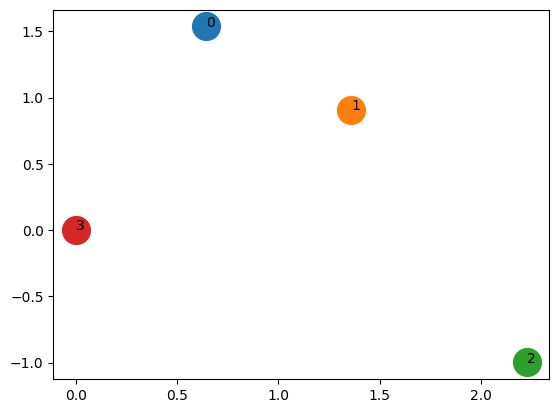

In [13]:
svd_metrix = np.hstack([U[:,0:1]*s[0],U[:,1:2]*s[1]])

for i in range(4):
    plt.plot(svd_metrix[i,0],svd_metrix[i,1],'o',markersize=20)
    plt.text(svd_metrix[i,0],svd_metrix[i,1],i)

plt.show()    

In [14]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")

In [15]:
countvectorizer=CountVectorizer()

countvectorizer.fit(sent)
print(countvectorizer.vocabulary_)
count_vec = countvectorizer.transform(sent)
count_vec.toarray()   

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}


array([[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]], dtype=int64)

In [16]:
from sklearn.metrics import jaccard_score
count_vector = count_vec.toarray()

print(count_vector[0] == count_vector[1])
union_vec = sum(count_vector[0] == count_vector[1])
print(union_vec)
count_vec.shape[1]

jaccard_similarity = union_vec/count_vec.shape[1]
print(jaccard_similarity.round(3))


def jaccard_sim(x):
    union_vec = sum(x[0]==x[1])
    jaccard_value = union_vec/x.shape[1]
    return jaccard_value.round(4)


jaccard_score = jaccard_sim(count_vector)
print(jaccard_score)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(sent)


[False False False False False False False False False False False  True
 False  True False False  True]
3
0.176
0.1765


TfidfVectorizer()

In [17]:
# consine similarity

from sklearn.metrics.pairwise import cosine_distances,euclidean_distances,manhattan_distances



In [18]:
count_vector[0]

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [19]:
# count vector
cos_dis_count=euclidean_distances(count_vector[0:1],count_vector[1:2])
print('cos distance, count vect',cos_dis_count)

cos_dis_tfidf=euclidean_distances(Tfidf_vector[0:1],Tfidf_vector[1:2])
print('cos distance, tfidfvect',cos_dis_tfidf)

cos distance, count vect [[3.74165739]]
cos distance, tfidfvect [[1.41421356]]


In [20]:
Tfidf_vector


array([[0.57735027, 0.        , 0.57735027, 0.        , 0.        ,
        0.        , 0.57735027, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.52640543, 0.        ,
        0.66767854, 0.        , 0.52640543, 0.        , 0.        ],
       [0.        , 0.52640543, 0.        , 0.52640543, 0.        ,
        0.        , 0.        , 0.        , 0.66767854, 0.        ],
       [0.        , 0.43779123, 0.        , 0.        , 0.55528266,
        0.        , 0.        , 0.43779123, 0.        , 0.55528266]])

In [21]:
# data_set = tf.keras.utils.get_file(
#     fname='imdb.tar.gz',
#     origin='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
#     extract=True
# )

In [22]:
import os
import glob

In [23]:
os.path.dirname('./aclImdb/')
os.path.join(os.path.dirname('./aclImdb/'),'train','pos')

'./aclImdb\\train\\pos'

In [24]:
folder_path = os.path.dirname('./aclImdb/')
tt_lists = ['train','test']
pn_lists = ['pos','neg']
file_paths=[]
data = {}

for i in tt_lists:
    for j in pn_lists:
        file_path = glob.glob(os.path.join(folder_path,i,j,'*.*'))
        data[i+"_"+j] = []

        for k in file_path:
            with open(k,'rt',encoding='utf-8')as f:
                data [i+"_"+j].append(f.read())

In [25]:
data.keys()
data['train_pos'][0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [26]:
import pandas as pd

In [27]:
print(type('train_pos'))

data_train_pos = pd.DataFrame(data['test_pos'],columns=['review'])
data_train_pos['sentiment']=1
data_train_pos.head()


data_train_neg = pd.DataFrame(data['test_neg'],columns=['review'])
data_train_pos['sentiment']=0
data_train_pos.head()


train_df=pd.concat([data_train_pos,data_train_neg],ignore_index=True)

train_df.head()


<class 'str'>


,review,sentiment


In [28]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

In [29]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [30]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [31]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [32]:
reviews = list(train_df['review'])

In [33]:
review = train_df['review']

In [34]:
tokenkizer_review = [len(x.split()) for x in review]
print('단어갯수',tokenkizer_review)

#tokenized_review

eumoji_review = [len(x.replace('',''))for x in review]
print('음절갯수',eumoji_review)

단어갯수 [140, 428, 147, 124, 120, 171, 108, 340, 436, 324, 280, 86, 282, 224, 145, 158, 195, 279, 129, 152, 214, 556, 168, 179, 141, 104, 109, 310, 150, 142, 244, 119, 159, 165, 437, 453, 54, 298, 221, 331, 356, 160, 527, 242, 112, 331, 966, 544, 87, 1839, 436, 541, 182, 539, 202, 715, 180, 162, 54, 278, 93, 181, 133, 216, 316, 165, 103, 223, 106, 96, 124, 194, 291, 322, 44, 148, 107, 326, 71, 224, 115, 262, 111, 117, 55, 56, 268, 129, 169, 159, 249, 76, 196, 119, 164, 55, 63, 101, 137, 166, 168, 216, 114, 160, 588, 159, 272, 242, 146, 507, 225, 337, 193, 54, 163, 116, 274, 395, 272, 354, 187, 104, 222, 197, 140, 221, 512, 159, 112, 110, 157, 142, 221, 145, 323, 171, 143, 211, 629, 237, 319, 199, 341, 135, 303, 103, 130, 160, 121, 649, 141, 172, 414, 299, 498, 329, 392, 153, 153, 185, 185, 133, 136, 295, 499, 90, 391, 333, 154, 149, 95, 148, 145, 173, 74, 110, 124, 133, 114, 390, 145, 123, 137, 147, 157, 220, 129, 133, 132, 147, 200, 135, 457, 273, 161, 421, 401, 161, 155, 150, 267, 183, 

(array([9.940e+02, 2.331e+03, 7.280e+03, 4.232e+03, 2.589e+03, 1.774e+03,
        1.321e+03, 9.610e+02, 7.770e+02, 5.490e+02, 4.630e+02, 3.510e+02,
        2.990e+02, 2.040e+02, 1.740e+02, 1.640e+02, 1.160e+02, 1.010e+02,
        7.800e+01, 7.600e+01, 7.900e+01, 5.200e+01, 1.200e+01, 3.000e+00,
        2.000e+00, 4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   52.  ,   325.04,   598.08,   871.12,  1144.16,  1417.2 ,
         1690.24,  1963.28,  2236.32,  2509.36,  2782.4 ,  3055.44,
         3328.48,  3601.52,  3874.56,  4147.6 ,  4420.64,  4693.68,
         4966.72,  5239.76,  5512.8 ,  5785.84,  6058.88,  6331.92,
         6604.96,  6878.  ,  7151.04,  7424.08,  7697.12,  7970.16,
         8243.2 ,  8516.24,  8789.28

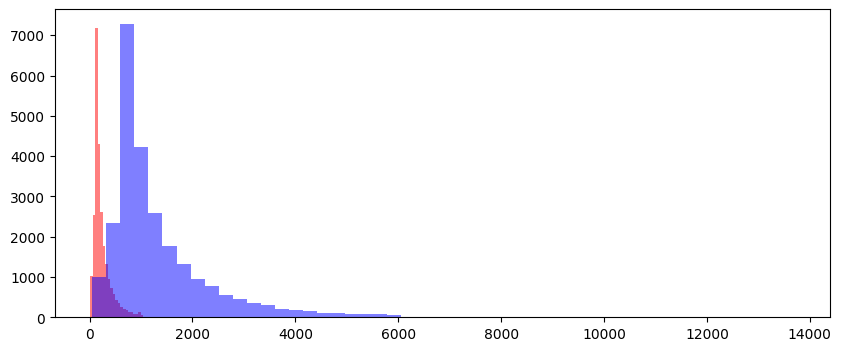

In [35]:
plt.figure(figsize=(10,4))

plt.hist(tokenkizer_review,bins=50,color='r',alpha =0.5,label='word')
plt.hist(eumoji_review,bins=50,color='b',alpha =0.5,label='word')


In [36]:
#EDA
def summary_token_len(x):
    print('문장의 최대 길이: {}'.format(np.max(x)))
    print('문장의 최소 길이: {}'.format(np.min(x)))
    print('문장의 평균 길이: {}'.format(np.mean(x)))
    print('문장의 표준편차 길이: {}'.format(np.std(x)))
    print('문장의 중앙값 길이: {}'.format(np.median(x)))
    print('문장의 1사분위수 길이: {}'.format(np.quantile(x,0.25)))
    print('문장의 2사분위수 길이: {}'.format(np.quantile(x,0.75)))



summary_token_len(tokenkizer_review)

문장의 최대 길이: 2470
문장의 최소 길이: 10
문장의 평균 길이: 233.7872
문장의 표준편차 길이: 173.72955740506566
문장의 중앙값 길이: 174.0
문장의 1사분위수 길이: 127.0
문장의 2사분위수 길이: 284.0


In [37]:
summary_token_len(eumoji_review)

문장의 최대 길이: 13704
문장의 최소 길이: 52
문장의 평균 길이: 1325.06964
문장의 표준편차 길이: 1003.1136072002365
문장의 중앙값 길이: 979.0
문장의 1사분위수 길이: 702.0
문장의 2사분위수 길이: 1614.0


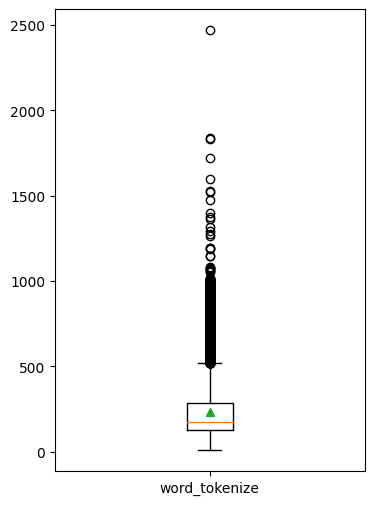

In [38]:
plt.figure(figsize=(4,6))
plt.boxplot(tokenkizer_review,
            labels=['word_tokenize'],
            showmeans=True)


plt.show()

In [39]:
! pip install wordcloud

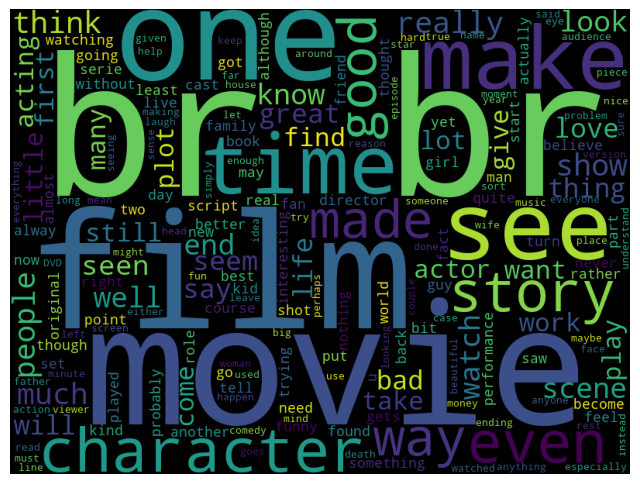

In [40]:
from wordcloud import WordCloud,STOPWORDS
MY_STOPWORDS = list(STOPWORDS) + ['title','character','br']
MY_STOPWORDS = set(MY_STOPWORDS)

x = ' '.join(review)
len(x)
word_cloud=WordCloud(stopwords=STOPWORDS,width=800,height=600).generate(x)

plt.figure(figsize=(8,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()